In [1]:
import pandas as pd
import numpy as np

In [2]:
import joblib

In [4]:
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
import seaborn as sns

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [7]:
import warnings
from sklearn.metrics import classification_report
from sklearn import metrics

In [8]:
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

In [10]:
price = pd.read_csv("price.csv").drop('Unnamed: 0',axis=1)
price.drop(0, inplace=True)
price.reset_index(drop=True, inplace=True)
price

,state,label,modal_price
0,andaman and nicobar,banana - green,5000.000000
1,andaman and nicobar,bhindi(ladies finger),7000.000000
2,andaman and nicobar,bitter gourd,7000.000000
3,andaman and nicobar,black pepper,120000.000000
4,andaman and nicobar,bottle gourd,3500.000000
...,...,...,...
612,west bengal,"sesamum(sesame,gingelly,til)",7566.666667
613,west bengal,sweet pumpkin,1144.285714
614,west bengal,tomato,856.666667
615,west bengal,turmeric,7325.000000


In [11]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        617 non-null    object 
 1   label        617 non-null    object 
 2   modal_price  617 non-null    float64
dtypes: float64(1), object(2)
memory usage: 14.6+ KB


In [12]:
price = price.astype({'modal_price':'float32'})

In [13]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        617 non-null    object 
 1   label        617 non-null    object 
 2   modal_price  617 non-null    float32
dtypes: float32(1), object(2)
memory usage: 12.2+ KB


In [14]:
price

,state,label,modal_price
0,andaman and nicobar,banana - green,5000.000000
1,andaman and nicobar,bhindi(ladies finger),7000.000000
2,andaman and nicobar,bitter gourd,7000.000000
3,andaman and nicobar,black pepper,120000.000000
4,andaman and nicobar,bottle gourd,3500.000000
...,...,...,...
612,west bengal,"sesamum(sesame,gingelly,til)",7566.666504
613,west bengal,sweet pumpkin,1144.285767
614,west bengal,tomato,856.666687
615,west bengal,turmeric,7325.000000


In [15]:
agri = pd.read_csv("agri data.csv")
agri

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04-03-2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04-03-2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04-03-2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04-03-2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04-03-2019,110000,130000,120000
...,...,...,...,...,...,...,...,...,...
2233,West Bengal,Uttar Dinajpur,Islampur,Potato,Jyoti,04-03-2019,530,570,550
2234,West Bengal,Uttar Dinajpur,Islampur,Rice,Other,04-03-2019,3550,3650,3600
2235,West Bengal,Uttar Dinajpur,Raiganj,Jute,TD-5,04-03-2019,4400,4600,4500
2236,West Bengal,Uttar Dinajpur,Raiganj,Rice,Other,04-03-2019,3450,3550,3500


In [16]:
agri['state'] = agri['state'].str.lower()
agri['district'] = agri['district'].str.lower()

In [17]:
agri

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,andaman and nicobar,south andaman,Port Blair,Amaranthus,Amaranthus,04-03-2019,6000,8000,7000
1,andaman and nicobar,south andaman,Port Blair,Banana - Green,Banana - Green,04-03-2019,4500,5500,5000
2,andaman and nicobar,south andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04-03-2019,6000,8000,7000
3,andaman and nicobar,south andaman,Port Blair,Bitter gourd,Other,04-03-2019,6000,8000,7000
4,andaman and nicobar,south andaman,Port Blair,Black pepper,Other,04-03-2019,110000,130000,120000
...,...,...,...,...,...,...,...,...,...
2233,west bengal,uttar dinajpur,Islampur,Potato,Jyoti,04-03-2019,530,570,550
2234,west bengal,uttar dinajpur,Islampur,Rice,Other,04-03-2019,3550,3650,3600
2235,west bengal,uttar dinajpur,Raiganj,Jute,TD-5,04-03-2019,4400,4600,4500
2236,west bengal,uttar dinajpur,Raiganj,Rice,Other,04-03-2019,3450,3550,3500


In [18]:
ag = agri.groupby(['state', 'district'])[['commodity','variety','modal_price']]

In [19]:
df = ag.get_group(("west bengal",'uttar dinajpur'))

In [20]:
df

,commodity,variety,modal_price
2232,Jute,TD-5,4600
2233,Potato,Jyoti,550
2234,Rice,Other,3600
2235,Jute,TD-5,4500
2236,Rice,Other,3500
2237,Wheat,Kalyan,2100


In [21]:
df.sort_values(by='modal_price', ascending=False)

,commodity,variety,modal_price
2232,Jute,TD-5,4600
2235,Jute,TD-5,4500
2234,Rice,Other,3600
2236,Rice,Other,3500
2237,Wheat,Kalyan,2100
2233,Potato,Jyoti,550


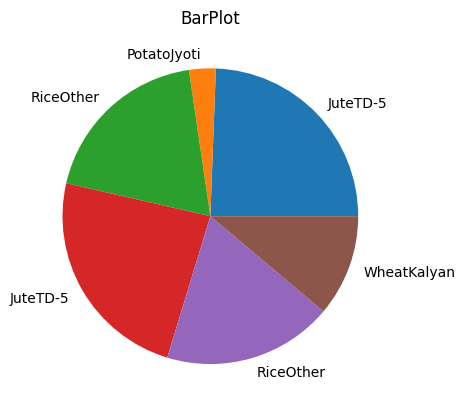

In [22]:
# set the title
plt.title('BarPlot')

plt.pie(df["modal_price"], labels = df['commodity']+df['variety'])
  
# show the plot
plt.show()

In [23]:
price['modal_price'] = price['modal_price'].apply(np.ceil)

In [24]:
price

,state,label,modal_price
0,andaman and nicobar,banana - green,5000.0
1,andaman and nicobar,bhindi(ladies finger),7000.0
2,andaman and nicobar,bitter gourd,7000.0
3,andaman and nicobar,black pepper,120000.0
4,andaman and nicobar,bottle gourd,3500.0
...,...,...,...
612,west bengal,"sesamum(sesame,gingelly,til)",7567.0
613,west bengal,sweet pumpkin,1145.0
614,west bengal,tomato,857.0
615,west bengal,turmeric,7325.0


In [25]:
p = price.groupby(['state'])[['label','modal_price']]
p

In [26]:
pf = p.get_group(("west bengal"))

In [27]:
vis = pf.sort_values(by='modal_price', ascending=False)

<Figure size 50000x50000 with 0 Axes>

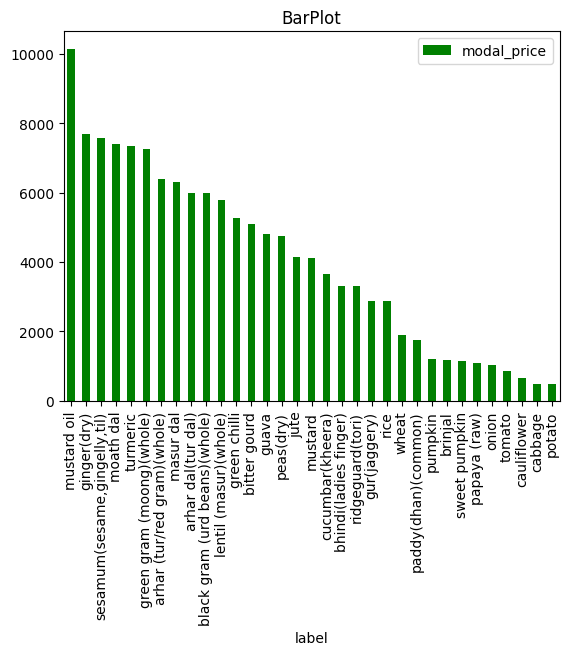

In [28]:
fig = plt.figure(figsize = (500, 500))
vis.plot(kind = 'bar',
        x = 'label',
        y = 'modal_price',
        color = 'green')
  
# set the title

plt.title('BarPlot')
  
# show the plot
plt.show()

In [29]:
price['C'] = price.groupby('state')[['label','modal_price']].cumcount()
price.sort_values(by=['C', 'modal_price'], inplace=True)
print (price)

price.drop('C', axis=1, inplace=True)

                 state                      label  modal_price   C
478          telangana                    brinjal        300.0   0
167  jammu and kashmir                cauliflower        800.0   0
347           nagaland  arecanut(betelnut/supari)       1500.0   0
424          rajasthan  bajra(pearl millet/cumbu)       1776.0   0
387             punjab                amphophalus       2000.0   0
..                 ...                        ...          ...  ..
560      uttar pradesh                    tobacco       1900.0  60
561      uttar pradesh                     tomato        787.0  61
562      uttar pradesh                      wheat       1879.0  62
563      uttar pradesh              white pumpkin        310.0  63
564      uttar pradesh                       wood        368.0  64

[617 rows x 4 columns]


In [30]:
print(price)

                 state                      label  modal_price
478          telangana                    brinjal        300.0
167  jammu and kashmir                cauliflower        800.0
347           nagaland  arecanut(betelnut/supari)       1500.0
424          rajasthan  bajra(pearl millet/cumbu)       1776.0
387             punjab                amphophalus       2000.0
..                 ...                        ...          ...
560      uttar pradesh                    tobacco       1900.0
561      uttar pradesh                     tomato        787.0
562      uttar pradesh                      wheat       1879.0
563      uttar pradesh              white pumpkin        310.0
564      uttar pradesh                       wood        368.0

[617 rows x 3 columns]


In [31]:
rain_merge = pd.read_csv("rain_merge_npk.csv")
rain_merge.drop('Unnamed: 0',axis=1, inplace=True)
rain_merge

,state,district,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,N,P,K
0,andhra pradesh,adilabad,0.0,0.0,15.2,3.5,22.9,244.5,118.9,272.1,84.9,75.9,8.0,0.5,L,L,H
1,bihar,begusarai,0.0,0.0,20.7,16.9,62.5,53.5,314.0,289.6,109.0,73.0,0.0,0.0,M,M,M
2,bihar,bhagalpur,4.0,0.0,18.4,22.6,111.3,66.8,377.5,319.3,216.0,272.3,0.1,0.0,L,M,M
3,bihar,bhojpur,0.0,0.0,0.0,7.4,28.6,88.2,222.6,110.7,124.5,2.3,0.0,0.0,M,M,M
4,assam,bongaigaon,0.0,50.8,60.8,390.2,221.6,394.0,404.5,1083.8,766.2,304.6,4.0,0.0,L,M,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,west bengal,hooghly,0.0,0.0,23.9,11.8,115.2,186.6,434.6,227.0,180.8,212.4,25.2,0.0,M,H,M
306,west bengal,jalpaiguri,1.9,0.8,83.8,101.3,287.4,631.0,569.7,1167.3,596.1,204.4,2.8,0.0,M,M,L
307,west bengal,nadia,0.0,0.0,12.4,12.2,136.3,221.3,404.2,200.9,147.4,155.2,23.6,0.0,M,M,M
308,west bengal,purulia,0.1,0.0,13.6,43.7,115.3,186.2,568.2,249.6,197.0,180.5,10.6,0.0,M,L,M


In [32]:
crops = pd.read_csv("Crop_recommendation.csv")
crops.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [33]:
crops['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [34]:
crops.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [35]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [36]:
crops.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [37]:
crops.shape

(2200, 8)

In [38]:
print("Number of various crops: ", len(crops['label'].unique()))
crops['label'].unique()

Number of various crops:  22


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [39]:
crops['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [40]:
crops1 = crops.drop(columns=['label'])

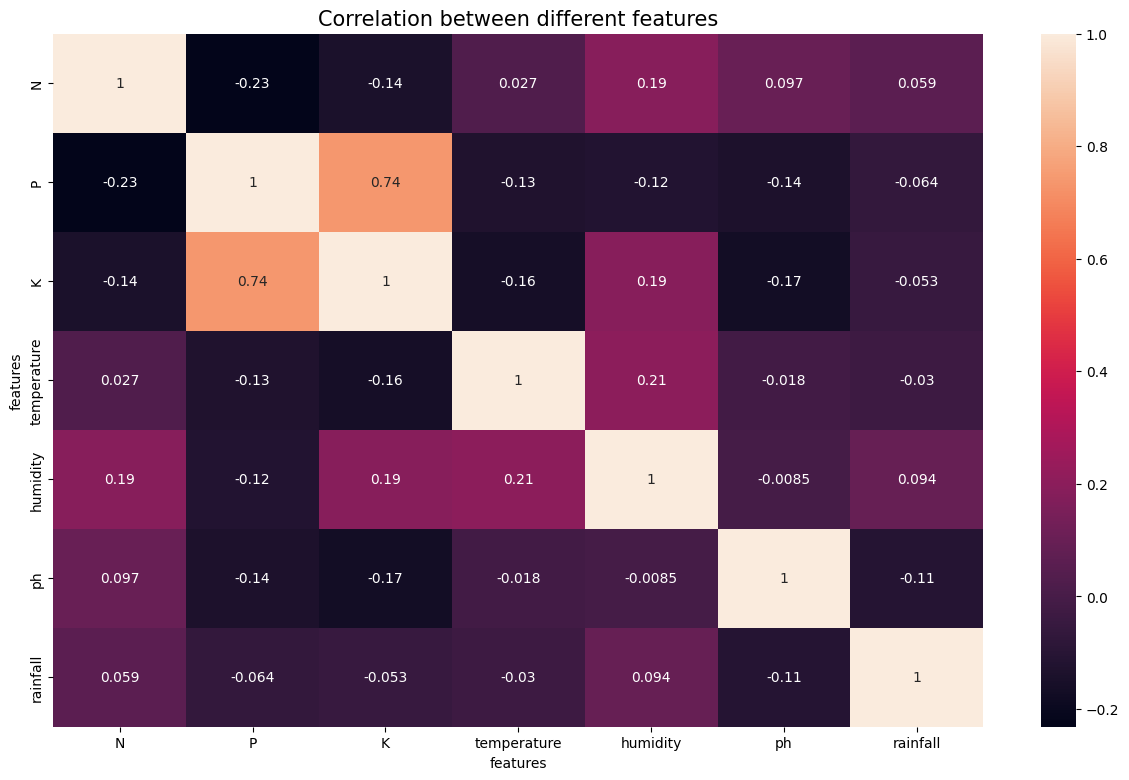

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(crops1.corr(), annot=True )
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [42]:
crop_summary = pd.pivot_table(crops,index=['label'],aggfunc='median')
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,200.0,24.0,136.5,92.416541,5.885818,112.979230,22.628290
banana,50.0,100.5,81.0,80.223599,5.994462,105.007750,27.443333
blackgram,19.0,41.0,67.0,65.026723,7.165240,68.293539,29.655515
chickpea,79.0,39.0,68.0,16.658634,7.356537,79.692282,18.878291
coconut,31.0,24.0,15.5,94.960581,5.990709,171.999922,27.385317
coffee,30.0,103.0,29.0,57.648083,6.798626,157.770963,25.656643
cotton,19.0,117.0,46.0,80.010893,6.840957,80.237095,23.964997
grapes,201.0,24.0,133.0,81.724647,6.001785,69.536186,23.018528
jute,40.0,78.0,46.0,79.469205,6.711500,175.590814,24.971106


In [43]:
features = crops.drop(['label'], axis=1)

In [44]:
target = crops['label']

In [45]:
features

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [46]:
target

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [47]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    thisdict = {
  "accuracy": [],
  "loss": [],
  "params": []
}
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
       # print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
        thisdict["accuracy"].append(round(mean, 3))
        thisdict["loss"].append(round(std * 2, 3))
        thisdict["params"].append(params)
    new = pd.DataFrame.from_dict(thisdict)
    print(new.sort_values('accuracy',ascending=False).reset_index(drop=True))
    return(new)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [49]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [50]:
X_test

,N,P,K,temperature,humidity,ph,rainfall
1451,101,17,47,29.494014,94.729813,6.185053,26.308209
1334,98,8,51,26.179346,86.522581,6.259336,49.430510
1761,59,62,49,43.360515,93.351916,6.941497,114.778071
1735,44,60,55,34.280461,90.555616,6.825371,98.540477
1576,30,137,200,22.914300,90.704756,5.603413,118.604465
...,...,...,...,...,...,...,...
59,99,55,35,21.723831,80.238990,6.501698,277.962619
71,67,45,38,22.727910,82.170688,7.300411,260.887506
1908,121,47,16,23.605640,79.295731,7.723240,72.498009
1958,116,52,19,22.942767,75.371706,6.114526,67.080226


In [51]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

1760 1760 440 440


In [52]:
RF = RandomForestClassifier(n_estimators=50, max_features='sqrt', max_depth=32, criterion='gini')
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_train)
x = metrics.accuracy_score(y_train, predicted_values)

predicted_values = RF.predict(X_test)
y = metrics.accuracy_score(y_test, predicted_values)

print("RF's Train Accuracy is: ", x)
print("RF's Accuracy is: ", y)

print(classification_report(y_test,predicted_values))

RF's Train Accuracy is:  1.0
RF's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange  

In [53]:
filename = "rf_model.joblib"
# save model
joblib.dump(RF, filename)

['rf_model.joblib']

In [54]:
model = joblib.load("rf_model.joblib")

data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = model.predict(data)
print(prediction[0])

coffee


C:\Users\oswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [55]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 20, 50, 100],
    'max_depth': [2, 4, 8, 16, 32, None],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None]

}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(features, target)

cv1 = print_results(cv)

BEST PARAMS: {'criterion': 'gini', 'max_depth': 16, 'max_features': 'log2', 'n_estimators': 20}

     accuracy   loss                                             params
0       0.996  0.002  {'criterion': 'gini', 'max_depth': 16, 'max_fe...
1       0.995  0.005  {'criterion': 'entropy', 'max_depth': 16, 'max...
2       0.995  0.005  {'criterion': 'gini', 'max_depth': 16, 'max_fe...
3       0.995  0.005  {'criterion': 'gini', 'max_depth': 16, 'max_fe...
4       0.995  0.007  {'criterion': 'gini', 'max_depth': 32, 'max_fe...
..        ...    ...                                                ...
211     0.490  0.048  {'criterion': 'entropy', 'max_depth': 2, 'max_...
212     0.470  0.079  {'criterion': 'log_loss', 'max_depth': 2, 'max...
213     0.415  0.178  {'criterion': 'entropy', 'max_depth': 2, 'max_...
214     0.390  0.118  {'criterion': 'gini', 'max_depth': 2, 'max_fea...
215     0.368  0.180  {'criterion': 'gini', 'max_depth': 2, 'max_fea...

[216 rows x 3 columns]


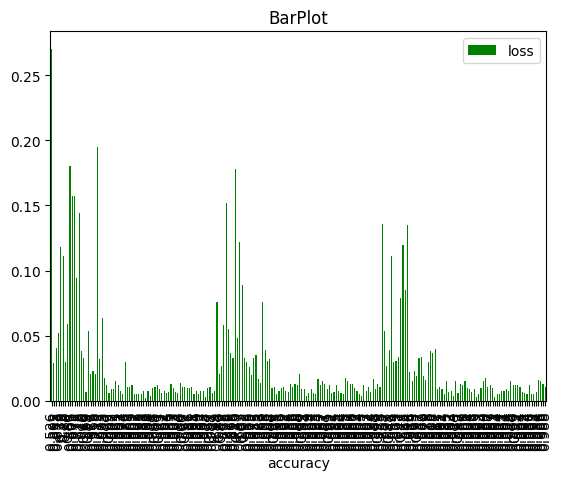

In [56]:
cv1 = cv1[['accuracy', 'loss']]
cv1.plot(kind = 'bar',
        x = 'accuracy',
        color = 'green')
  
# set the title
plt.title('BarPlot')
  
# show the plot
plt.show()

In [57]:
model_selection = {
    'model' : ['DecisionTree', 'NaiveBayes', 'LogisticRegression', 'RandomForest', 'XgBoost', 'LightGBM', 'SVM'],
    'accuracy' : [0.989, 0.995, 0.958, 0.995, 0.991, 0.993, 0.985],
    'loss' : [0.008, 0.004, 0.013, 0.07, 0.007, 0.009, 0.015],
}

In [58]:
models = pd.DataFrame.from_dict(model_selection)

In [59]:
models

,model,accuracy,loss
0,DecisionTree,0.989,0.008
1,NaiveBayes,0.995,0.004
2,LogisticRegression,0.958,0.013
3,RandomForest,0.995,0.070
4,XgBoost,0.991,0.007
5,LightGBM,0.993,0.009
6,SVM,0.985,0.015


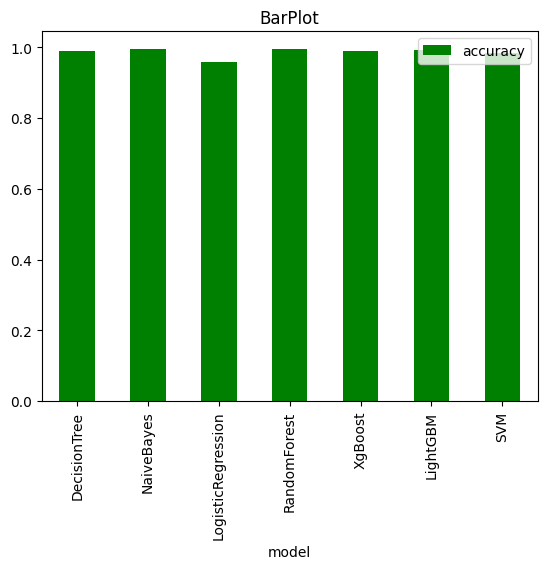

In [60]:
models.plot(kind = 'bar',
        x = 'model',
        y = 'accuracy',
        color = 'green')
  
# set the title
plt.title('BarPlot')
  
# show the plot
plt.show()